In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/singapore-airbnb/listings.csv


In [30]:
airbnb = pd.read_csv('/kaggle/input/singapore-airbnb/listings.csv')

In [31]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [32]:
pd.isnull(airbnb).sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [33]:
len(airbnb)

7907

In [34]:
airbnb[airbnb["name"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1024,9436273,NaN,41240585,Audrey,Central Region,Bukit Merah,1.29108,103.83077,Private room,69,2,4,2015-12-13,0.09,1,0
1331,11573500,NaN,61163169,Educator,Central Region,Bishan,1.35221,103.85148,Private room,650,1,0,NaN,NaN,1,0


In [35]:
airbnb.dropna(subset=['name'], inplace=True) # dropped the rows where name of room type is not mentioned 

In [36]:
airbnb[airbnb['last_review'].isnull()].head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18,355955,Double room in an Authentic Peranakan Shophouse,1759905,Aresha,Central Region,Geylang,1.31420,103.90232,Private room,81,90,0,NaN,NaN,1,173
23,481789,Master Bedroom in Newly Built Flat,2386154,Susan,East Region,Tampines,1.34816,103.93238,Private room,37,180,0,NaN,NaN,1,365


In [37]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [38]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

In [40]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.905000e+03,7.905000e+03,7905.000000,7905.000000,7905.000000,7905.000000,7905.00000,5148.000000,7905.000000,7905.000000
mean,2.339188e+07,9.115491e+07,1.314191,103.848789,169.284883,17.514105,12.81012,1.043854,40.617710,208.779127
std,1.016337e+07,8.191684e+07,0.030577,0.043680,340.185801,42.099171,29.71099,1.285907,65.140446,146.100788
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.00000,0.010000,1.000000,0.000000
25%,1.582658e+07,2.305332e+07,1.295800,103.835830,65.000000,1.000000,0.00000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.00000,0.550000,9.000000,260.000000
75%,3.234852e+07,1.553917e+08,1.322110,103.872560,199.000000,10.000000,10.00000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.00000,13.000000,274.000000,365.000000


### Distribution Plot of Price 

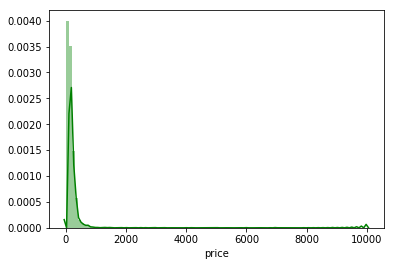

In [41]:
sns.distplot(airbnb['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Box plot of Price vs Room Type 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

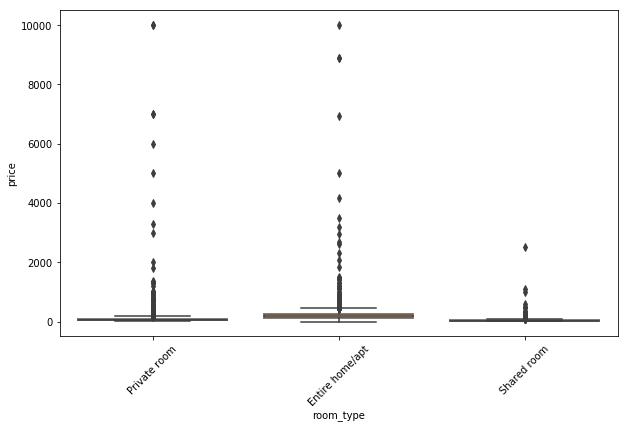

In [42]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='room_type', y='price', data=airbnb)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### Count plot of Neightbourhood Group & Room Type 

[Text(0, 0, 'North Region'),
 Text(0, 0, 'Central Region'),
 Text(0, 0, 'East Region'),
 Text(0, 0, 'West Region'),
 Text(0, 0, 'North-East Region')]

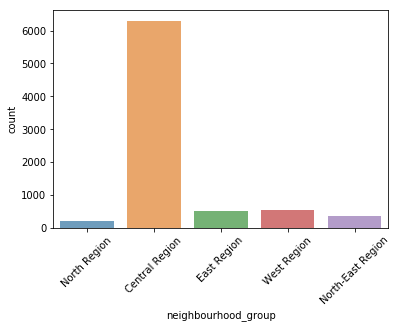

In [43]:
c = sns.countplot(x=airbnb['neighbourhood_group'], alpha=0.7, data=airbnb)
c.set_xticklabels(c.get_xticklabels(), rotation=45)

[Text(0, 0, 'Private room'),
 Text(0, 0, 'Entire home/apt'),
 Text(0, 0, 'Shared room')]

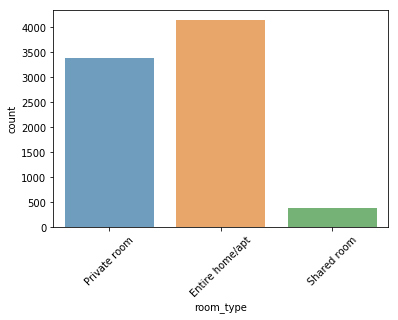

In [44]:
c = sns.countplot(x=airbnb['room_type'], alpha=0.7, data=airbnb)
c.set_xticklabels(c.get_xticklabels(), rotation=45)

### Correlation Matrix of Price vs different Categorical variables

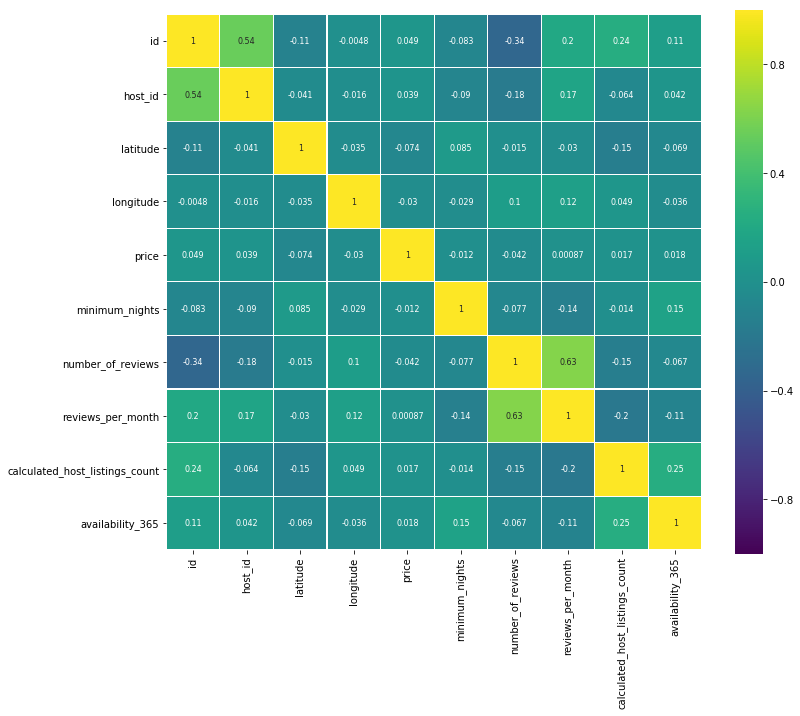

In [45]:
corr = airbnb.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [46]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [49]:
airbnb['log_price'] = np.log(airbnb['price']+1)
features_to_analyse = ['id', 'host_id', 'price','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count','availability_365', 'log_price']

### Correction using plot

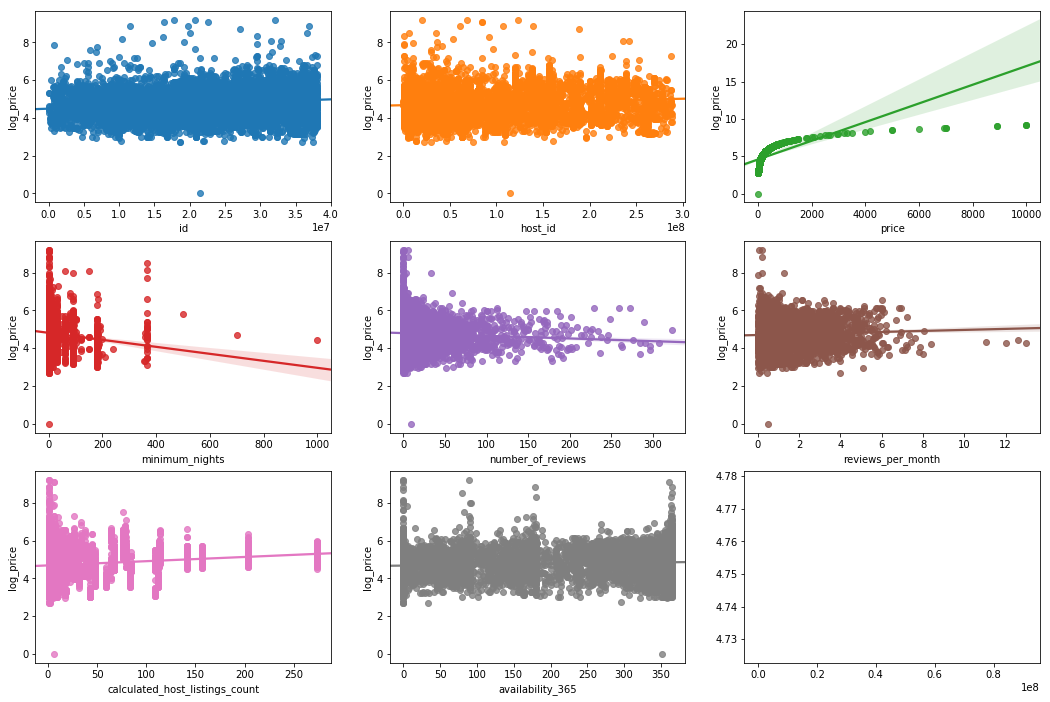

In [50]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='log_price', data=airbnb[features_to_analyse], ax=ax)

### Observations

There is no direct correlation that is visible between different variables and price. 